In [ ]:
    # !pip install medmnist

In [2]:
# https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb

In [3]:
%load_ext autoreload
%autoreload 1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import medmnist
from medmnist import INFO, Evaluator
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F

from tqdm import tqdm

%aimport vq_vae_model

%aimport utils
from utils import plot_real_vs_constructed 
# from basic_vae import VariationalAutoencoder

In [47]:
data_flag = 'pathmnist'
#data_flag = 'breastmnist'
# data_flag = 'octmnist'
# data_flag = 'chestmnist'
#data_flag = 'bloodmnist'
#data_flag = 'organamnist'
#data_flag = 'tissuemnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 64
lr = 0.0001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
                                      transforms.ToTensor(),
                                      #transforms.Normalize((0.5,0.5,0.5), (1.0,1.0,1.0))
                                  ])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)


Using downloaded and verified file: C:\Users\kella\.medmnist\pathmnist.npz
Using downloaded and verified file: C:\Users\kella\.medmnist\pathmnist.npz
Using downloaded and verified file: C:\Users\kella\.medmnist\pathmnist.npz


In [48]:
train_dataset.imgs.shape

(89996, 28, 28, 3)

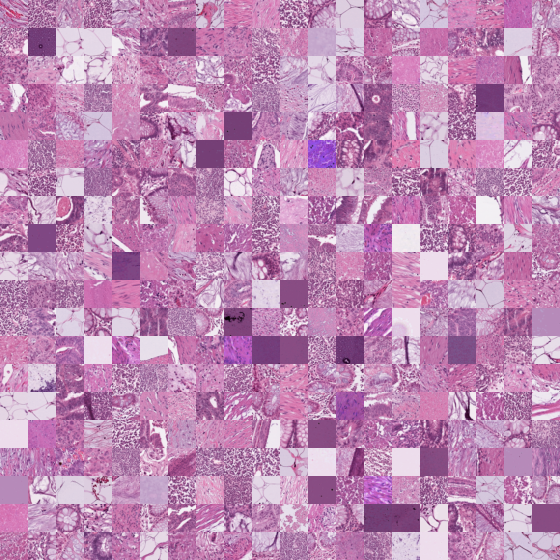

In [49]:
train_dataset.montage()

In [50]:
train_dataset.imgs.max()

255

In [51]:
batch_size = 256
num_training_updates = 15000

num_hiddens = 128
num_residual_hiddens = 32
num_residual_layers = 2

embedding_dim = 64
num_embeddings = 512

commitment_cost = 0.25

decay = 0.99

learning_rate = 1e-3
channel = 3


epochs=100
path = "{}_epochs_{}.tar".format(data_flag,epochs)

In [52]:
from vq_vae_model import VariationalAutoencoder


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = VariationalAutoencoder(num_hiddens, num_residual_layers, num_residual_hiddens,
              num_embeddings, embedding_dim, 
              commitment_cost,decay,input_channel=channel ,output_channel=channel ).to(device) # GPU

vae.train(train_loader, lr=0.001, epochs=epochs, device=device)
# vae.train(train_loader, lr=0.0001, epochs=10, device=device)
# plot_latent(vae, train_loader)

100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.44it/s]


1 iterations
recon_error: 0.127
perplexity: 4.274



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.58it/s]


2 iterations
recon_error: 0.086
perplexity: 9.447



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.07it/s]


3 iterations
recon_error: 0.075
perplexity: 17.022



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.23it/s]


4 iterations
recon_error: 0.075
perplexity: 20.209



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.58it/s]


5 iterations
recon_error: 0.072
perplexity: 22.275



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.47it/s]


6 iterations
recon_error: 0.061
perplexity: 23.948



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.38it/s]


7 iterations
recon_error: 0.058
perplexity: 25.138



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.51it/s]


8 iterations
recon_error: 0.057
perplexity: 30.517



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.65it/s]


9 iterations
recon_error: 0.056
perplexity: 32.461



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.52it/s]


10 iterations
recon_error: 0.054
perplexity: 39.165



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.47it/s]


11 iterations
recon_error: 0.054
perplexity: 41.689



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.51it/s]


12 iterations
recon_error: 0.049
perplexity: 81.397



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.48it/s]


13 iterations
recon_error: 0.046
perplexity: 106.231



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.46it/s]


14 iterations
recon_error: 0.045
perplexity: 120.565



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.46it/s]


15 iterations
recon_error: 0.044
perplexity: 148.557



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.45it/s]


16 iterations
recon_error: 0.043
perplexity: 194.383



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.51it/s]


17 iterations
recon_error: 0.040
perplexity: 227.679



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.49it/s]


18 iterations
recon_error: 0.038
perplexity: 252.939



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.43it/s]


19 iterations
recon_error: 0.037
perplexity: 290.899



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.38it/s]


20 iterations
recon_error: 0.037
perplexity: 316.682



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.55it/s]


21 iterations
recon_error: 0.036
perplexity: 335.023



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.50it/s]


22 iterations
recon_error: 0.036
perplexity: 335.361



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.55it/s]


23 iterations
recon_error: 0.036
perplexity: 332.056



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.46it/s]


24 iterations
recon_error: 0.036
perplexity: 330.450



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.44it/s]


25 iterations
recon_error: 0.036
perplexity: 326.062



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.48it/s]


26 iterations
recon_error: 0.036
perplexity: 328.759



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.47it/s]


27 iterations
recon_error: 0.035
perplexity: 323.858



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.44it/s]


28 iterations
recon_error: 0.035
perplexity: 325.549



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 45.81it/s]


29 iterations
recon_error: 0.035
perplexity: 326.999



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.36it/s]


30 iterations
recon_error: 0.035
perplexity: 328.894



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.42it/s]


31 iterations
recon_error: 0.035
perplexity: 325.869



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.35it/s]


32 iterations
recon_error: 0.034
perplexity: 327.595



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.43it/s]


33 iterations
recon_error: 0.034
perplexity: 329.477



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.44it/s]


34 iterations
recon_error: 0.034
perplexity: 321.744



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.41it/s]


35 iterations
recon_error: 0.034
perplexity: 327.913



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.45it/s]


36 iterations
recon_error: 0.034
perplexity: 327.074



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.49it/s]


37 iterations
recon_error: 0.034
perplexity: 323.111



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.45it/s]


38 iterations
recon_error: 0.034
perplexity: 328.632



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.48it/s]


39 iterations
recon_error: 0.034
perplexity: 326.670



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.42it/s]


40 iterations
recon_error: 0.034
perplexity: 327.198



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.46it/s]


41 iterations
recon_error: 0.034
perplexity: 324.421



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.46it/s]


42 iterations
recon_error: 0.035
perplexity: 328.744



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.53it/s]


43 iterations
recon_error: 0.034
perplexity: 322.487



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.50it/s]


44 iterations
recon_error: 0.034
perplexity: 329.709



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.56it/s]


45 iterations
recon_error: 0.034
perplexity: 325.887



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.42it/s]


46 iterations
recon_error: 0.034
perplexity: 328.704



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.52it/s]


47 iterations
recon_error: 0.035
perplexity: 330.994



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.52it/s]


48 iterations
recon_error: 0.034
perplexity: 330.994



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.52it/s]


49 iterations
recon_error: 0.034
perplexity: 331.627



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.40it/s]


50 iterations
recon_error: 0.034
perplexity: 329.180



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.50it/s]


51 iterations
recon_error: 0.034
perplexity: 324.220



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:31<00:00, 45.18it/s]


52 iterations
recon_error: 0.035
perplexity: 328.343



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.54it/s]


53 iterations
recon_error: 0.034
perplexity: 329.874



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.37it/s]


54 iterations
recon_error: 0.034
perplexity: 329.298



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.21it/s]


55 iterations
recon_error: 0.034
perplexity: 328.588



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.62it/s]


56 iterations
recon_error: 0.034
perplexity: 331.506



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 48.15it/s]


57 iterations
recon_error: 0.033
perplexity: 327.673



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.36it/s]


58 iterations
recon_error: 0.034
perplexity: 326.271



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.80it/s]


59 iterations
recon_error: 0.034
perplexity: 333.512



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.87it/s]


60 iterations
recon_error: 0.034
perplexity: 331.969



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.18it/s]


61 iterations
recon_error: 0.034
perplexity: 330.121



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 48.22it/s]


62 iterations
recon_error: 0.034
perplexity: 328.066



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.80it/s]


63 iterations
recon_error: 0.034
perplexity: 324.100



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.51it/s]


64 iterations
recon_error: 0.034
perplexity: 327.783



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 48.30it/s]


65 iterations
recon_error: 0.034
perplexity: 328.371



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.66it/s]


66 iterations
recon_error: 0.033
perplexity: 329.007



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 46.95it/s]


67 iterations
recon_error: 0.034
perplexity: 332.095



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.61it/s]


68 iterations
recon_error: 0.033
perplexity: 332.757



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.73it/s]


69 iterations
recon_error: 0.034
perplexity: 330.166



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.27it/s]


70 iterations
recon_error: 0.033
perplexity: 331.779



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.78it/s]


71 iterations
recon_error: 0.033
perplexity: 329.022



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:28<00:00, 48.65it/s]


72 iterations
recon_error: 0.033
perplexity: 325.436



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.82it/s]


73 iterations
recon_error: 0.034
perplexity: 330.776



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.01it/s]


74 iterations
recon_error: 0.033
perplexity: 329.849



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:28<00:00, 49.10it/s]


75 iterations
recon_error: 0.033
perplexity: 326.479



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.73it/s]


76 iterations
recon_error: 0.033
perplexity: 326.688



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.67it/s]


77 iterations
recon_error: 0.034
perplexity: 332.735



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.12it/s]


78 iterations
recon_error: 0.033
perplexity: 329.735



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 46.99it/s]


79 iterations
recon_error: 0.032
perplexity: 324.504



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 48.19it/s]


80 iterations
recon_error: 0.033
perplexity: 327.715



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 46.93it/s]


81 iterations
recon_error: 0.033
perplexity: 331.625



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 46.91it/s]


82 iterations
recon_error: 0.033
perplexity: 322.606



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.54it/s]


83 iterations
recon_error: 0.033
perplexity: 327.944



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 46.96it/s]


84 iterations
recon_error: 0.032
perplexity: 324.791



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:28<00:00, 48.94it/s]


85 iterations
recon_error: 0.033
perplexity: 329.249



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.76it/s]


86 iterations
recon_error: 0.032
perplexity: 324.446



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:31<00:00, 45.03it/s]


87 iterations
recon_error: 0.033
perplexity: 330.444



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:31<00:00, 44.76it/s]


88 iterations
recon_error: 0.033
perplexity: 325.989



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 48.27it/s]


89 iterations
recon_error: 0.033
perplexity: 329.395



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 46.97it/s]


90 iterations
recon_error: 0.033
perplexity: 329.453



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:28<00:00, 49.15it/s]


91 iterations
recon_error: 0.033
perplexity: 331.769



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.69it/s]


92 iterations
recon_error: 0.033
perplexity: 328.953



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:29<00:00, 47.34it/s]


93 iterations
recon_error: 0.033
perplexity: 329.514



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:28<00:00, 48.64it/s]


94 iterations
recon_error: 0.033
perplexity: 326.260



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.37it/s]


95 iterations
recon_error: 0.033
perplexity: 328.356



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.19it/s]


96 iterations
recon_error: 0.033
perplexity: 329.021



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.43it/s]


97 iterations
recon_error: 0.033
perplexity: 327.789



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 46.37it/s]


98 iterations
recon_error: 0.033
perplexity: 324.017



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 45.62it/s]


99 iterations
recon_error: 0.033
perplexity: 329.990



100%|██████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:30<00:00, 45.57it/s]

100 iterations
recon_error: 0.033
perplexity: 327.548



In [53]:
def plot_real_vs_constructed(vae, test_dataset, device):
    imgs = np.zeros((4*29, 8*29, 3))
    diff = 0.
    for i in range(8):
        test_img = test_dataset[i][0][None,:,:,:].to(device)
        z = vae._encoder(test_img)
        z = vae._pre_vq_conv(z)
        loss, quantized, perplexity, _ = vae._vq_vae(z)
        img = vae._decoder(quantized)


        imgs[:28, i*28+(i*1):(i+1)*28+(i*1), :] = test_img[0].moveaxis(0, 2).cpu().detach().numpy()
        imgs[28+1:28*2+1, i*28+(i*1):(i+1)*28+(i*1), :] = img[0].moveaxis(0, 2).cpu().detach().numpy()

        diff += ((test_img - img)**2).mean()

    for i in range(8):
        test_img = test_dataset[i+8][0][None,:,:,:].to(device)
        z = vae._encoder(test_img)
        z = vae._pre_vq_conv(z)
        loss, quantized, perplexity, _ = vae._vq_vae(z)
        img = vae._decoder(quantized)

        imgs[2*29+1:3*28+3, i*28+(i*1):(i+1)*28+(i*1), :] = test_img[0].moveaxis(0, 2).cpu().detach().numpy()
        imgs[3*28+4:, i*28+(i*1):(i+1)*28+(i*1), :] = img[0].moveaxis(0, 2).cpu().detach().numpy()

        diff += ((test_img - img)**2).mean()

    print((diff/8).item())        
    plt.figure(figsize=(20,20))
    plt.imshow(imgs, cmap="gray")
    plt.plot()

0.005078003741800785


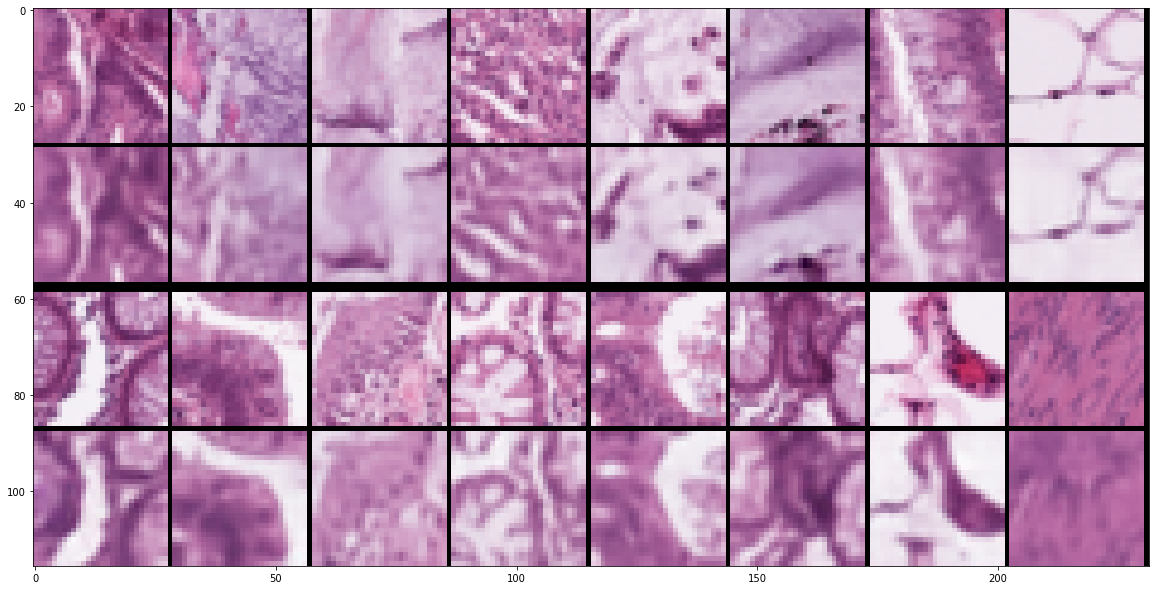

In [54]:
plot_real_vs_constructed(vae, test_dataset, device)

In [55]:
torch.save({
  'epoch': epochs,
  'encoder': vae._encoder.state_dict(),
  'pre_vq_conv': vae._pre_vq_conv.state_dict(),
  "decoder": vae._decoder.state_dict()
}, path)

In [56]:
vae_load = VariationalAutoencoder(num_hiddens, num_residual_layers, num_residual_hiddens,
              num_embeddings, embedding_dim, 
              commitment_cost,decay,input_channel=channel ,output_channel=channel ).to(device)
checkpoint = torch.load(path)
vae_load._encoder.load_state_dict(checkpoint['encoder'])
vae_load._pre_vq_conv.load_state_dict(checkpoint['pre_vq_conv'])
vae_load._decoder.load_state_dict(checkpoint[ "decoder"])

<All keys matched successfully>

torch.Size([1, 12, 12])


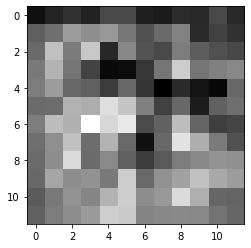

In [20]:
z = torch.randint(-1,1, (embedding_dim,3,3), dtype=torch.float, device=device)
img = vae._decoder.forward(z)
print(img.shape)
# img = F.normalize(img)
plt.imshow(img.cpu().detach().numpy()[0], cmap="gray")
# plt.imshow(img.moveaxis(1, 3).cpu().detach().numpy()[0])
plt.show()

In [21]:
test_img = test_dataset[5][0][None,:,:,:].to(device)
lat = vae.encoder.forward(test_img)
img = vae.decoder.forward(lat)

AttributeError: 'VariationalAutoencoder' object has no attribute 'encoder'

[]

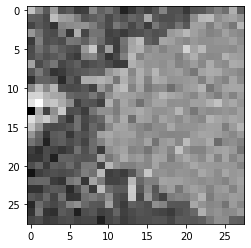

In [22]:
plt.imshow(test_img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

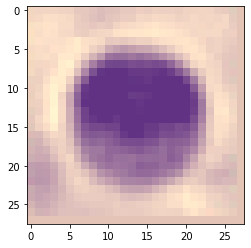

In [105]:
# img = F.normalize(img)
plt.imshow(img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


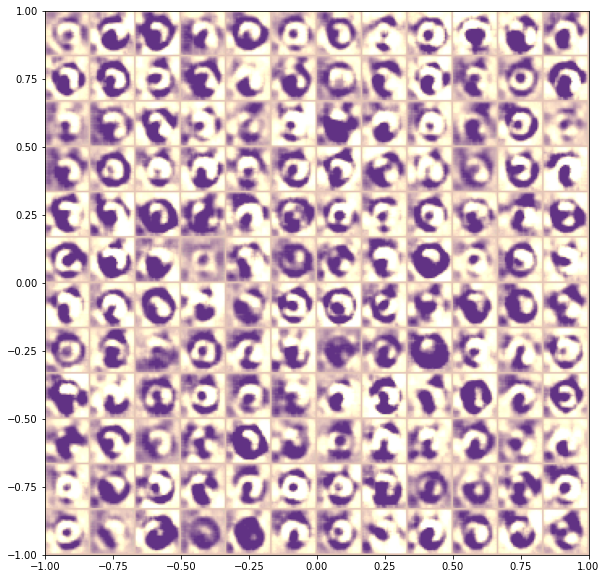

In [106]:
plot_reconstructed(vae, r0=(-1, 1), r1=(-1, 1), latent_dim=latent_dims)

# New Section

In [21]:
i = torch.randn((3, 28, 28))
cov1 = nn.Conv2d(3, 6, 3, stride=2)
cov2 = nn.Conv2d(6, 12, 3, stride=2)
m1 = nn.MaxPool2d(2)
m2 = nn.MaxUnpool2d(3)
lin1 = nn.Linear(75,108)
cov3 = nn.ConvTranspose2d(12,6,3, stride=2)#, output_padding=1)
cov4 = nn.ConvTranspose2d(6,3,3, stride=2, output_padding=1)
cov5 = nn.ConvTranspose2d(3,3,1, stride=1)#, output_padding=1)
print(i.flatten().shape, i.shape)
x = cov1(i)
x = cov2(x)
# x = m1(x)
print(x.flatten().shape, x.shape)
# x = lin1(x.flatten())
# x = x.reshape(3,6,6)
x = cov3(x)
x = cov4(x)
# x = cov4_5(x)
x = cov5(x)
# x = m2(x)
print(x.flatten().shape, x.shape)


torch.Size([2352]) torch.Size([3, 28, 28])
torch.Size([432]) torch.Size([12, 6, 6])
torch.Size([2352]) torch.Size([3, 28, 28])
